In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3013 non-null   datetime64[ns]
 1   Demanda    3013 non-null   float64       
 2   VolUtil    3013 non-null   float64       
 3   Aportes    3013 non-null   float64       
 4   PrecioB    3013 non-null   float64       
 5   PrecioO    3013 non-null   float64       
 6   DispTer    3013 non-null   float64       
 7   DispNoTer  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 188.4 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2019-01-01')
end_time = pd.to_datetime('2022-12-31')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
1096,6.076676e+06,1.210678e+10,63035900.0,295.306767,363.200411,4.579924e+06,9.215847e+06,2019,1,1
1097,7.214498e+06,1.203963e+10,60901300.0,335.852213,374.236041,4.461526e+06,9.353806e+06,2019,1,2
1098,7.624666e+06,1.195639e+10,64058000.0,371.514627,366.866819,4.362172e+06,9.085087e+06,2019,1,3
1099,7.809947e+06,1.187703e+10,62531300.0,375.750485,364.150596,4.389875e+06,8.909501e+06,2019,1,4
1100,7.571570e+06,1.180290e+10,62769100.0,359.648778,361.939467,4.320874e+06,9.099160e+06,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
2551,8.521143e+06,1.462431e+10,154789300.0,444.593687,615.591675,4.547375e+06,1.041296e+07,2022,12,26
2552,8.865542e+06,1.458431e+10,175677200.0,467.576040,628.079660,4.453366e+06,1.040160e+07,2022,12,27
2553,9.096495e+06,1.452944e+10,165261000.0,509.280527,611.296773,4.611281e+06,1.044798e+07,2022,12,28
2554,8.975143e+06,1.445778e+10,150082100.0,507.731437,613.201844,4.581000e+06,1.044604e+07,2022,12,29


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil      Aportes     PrecioO       DispTer  \
1096  6.076676e+06  1.210678e+10   63035900.0  363.200411  4.579924e+06   
1097  7.214498e+06  1.203963e+10   60901300.0  374.236041  4.461526e+06   
1098  7.624666e+06  1.195639e+10   64058000.0  366.866819  4.362172e+06   
1099  7.809947e+06  1.187703e+10   62531300.0  364.150596  4.389875e+06   
1100  7.571570e+06  1.180290e+10   62769100.0  361.939467  4.320874e+06   
...            ...           ...          ...         ...           ...   
2552  8.865542e+06  1.458431e+10  175677200.0  628.079660  4.453366e+06   
2553  9.096495e+06  1.452944e+10  165261000.0  611.296773  4.611281e+06   
2554  8.975143e+06  1.445778e+10  150082100.0  613.201844  4.581000e+06   
2555  8.780105e+06  1.440128e+10  139303200.0  608.332576  4.578537e+06   
2556  8.120581e+06  1.438093e+10  148298100.0  600.180013  4.578250e+06   

         DispNoTer  year  month  day  
1096  9.215847e+06  2019      1    1  
1097  9.353806e+06  2

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.6000000000000002, 'n_estimators': 75}


In [15]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -33.981111596490386


In [16]:
grid_search.cv_results_

{'mean_fit_time': array([0.04911947, 0.06132793, 0.0652812 , 0.06274209, 0.08658137,
        0.08266549, 0.12409544, 0.15618391, 0.13522334, 0.15114174,
        0.17469559, 0.21381288, 0.18474474, 0.23503389, 0.23963966,
        0.28776464, 0.32306271, 0.5782032 , 0.72432022, 0.02035904,
        0.03972616, 0.05345302, 0.07583861, 0.1397563 , 0.15649352,
        0.14860301, 0.17813611, 0.17071228, 0.19741244, 0.16981845,
        0.19091196, 0.20811639, 0.23636603, 0.30619082, 0.25764332,
        0.2434062 , 0.2795568 , 0.25994329, 0.02234659, 0.03329997,
        0.04727159, 0.08331099, 0.08005891, 0.08898621, 0.09993396,
        0.12310529, 0.13461165, 0.15909705, 0.1588985 , 0.17525058,
        0.20359187, 0.19979548, 0.23190398, 0.23121223, 0.23249831,
        0.27651391, 0.31958795, 0.02154698, 0.03670273, 0.05947819,
        0.08049464, 0.09231319, 0.10588102, 0.13442855, 0.13872933,
        0.15461569, 0.20196323, 0.17953253, 0.21557555, 0.27384996,
        0.22638869, 0.25356808,

In [17]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=65, max_features=0.6, random_state=75)

In [18]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=65, random_state=75)

In [19]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [20]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 34.688149471664325


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 21.392206930252904


In [22]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.9102742856118038


In [23]:
# Calcular los residuos
residuos = y_test - predictions

In [24]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [25]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

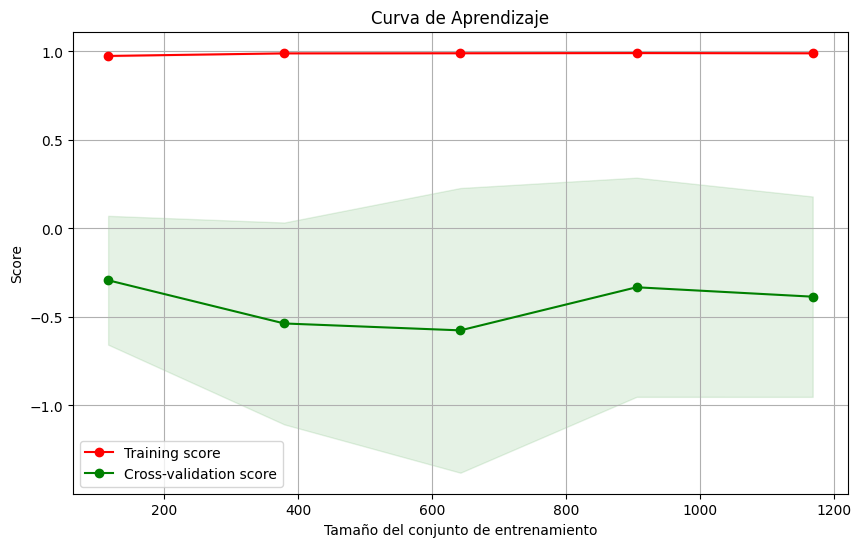

In [26]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

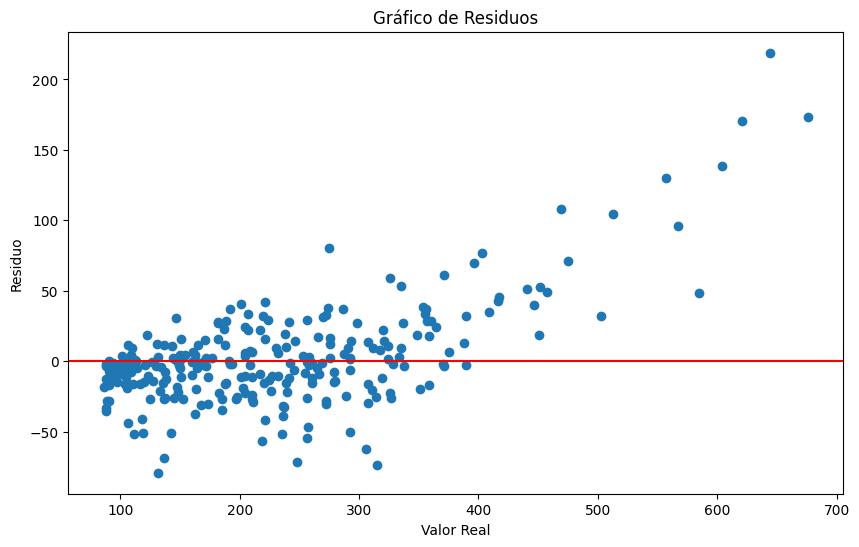

In [27]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

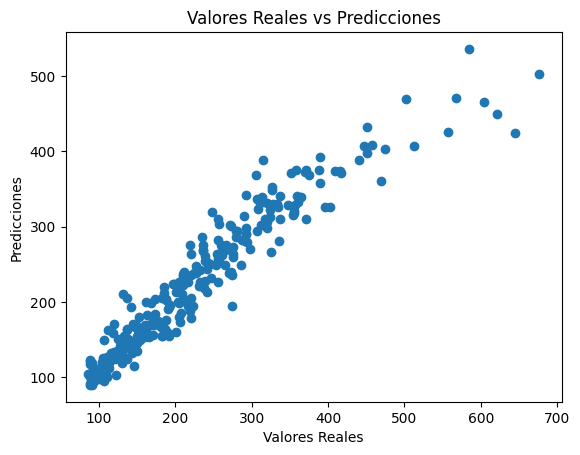

In [28]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

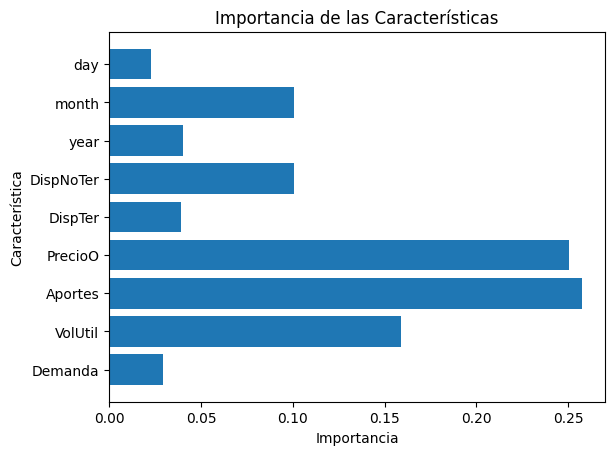

In [29]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [31]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2023-01-01')
end_time_future = pd.to_datetime('2024-02-28')

In [32]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [33]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [34]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       424 non-null    datetime64[ns]
 1   Demanda    424 non-null    float64       
 2   VolUtil    424 non-null    float64       
 3   Aportes    424 non-null    float64       
 4   PrecioB    424 non-null    float64       
 5   PrecioO    424 non-null    float64       
 6   DispTer    424 non-null    float64       
 7   DispNoTer  424 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 29.8 KB


In [35]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_28624\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [36]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [37]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    424 non-null    float64
 1   VolUtil    424 non-null    float64
 2   Aportes    424 non-null    float64
 3   PrecioO    424 non-null    float64
 4   DispTer    424 non-null    float64
 5   DispNoTer  424 non-null    float64
 6   year       424 non-null    int32  
 7   month      424 non-null    int32  
 8   day        424 non-null    int32  
dtypes: float64(6), int32(3)
memory usage: 28.2 KB


In [38]:
predicciones_futuras = best_model.predict(df_future2)

In [39]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [356.83151321 317.39758918 338.89212731 342.75813305 363.08574367
 340.36453851 314.83578097 304.18364377 308.63398546 303.57256769
 297.72166087 297.89961428 302.52274836 289.26435056 328.22745097
 333.80219987 345.46026687 338.53913523 354.1001989  353.11209746
 354.47762408 339.37006962 314.79068187 299.16661374 316.80537936
 353.39193315 321.688743   347.63102962 367.58230162 420.61161741
 467.59740613 526.80312049 496.95674782 480.12090697 471.74796723
 423.94425364 444.83025549 387.73329536 392.20296479 386.36309651
 386.80371756 380.43945421 349.08241592 328.14830982 383.47907033
 324.09672072 321.59640962 329.12774964 340.64561226 327.08522338
 333.3642671  333.43664164 322.8633081  333.20053515 382.61829105
 388.73643577 373.27884195 388.08010933 366.81837931 373.09704082
 394.92203551 408.48167541 284.46797613 268.93073885 269.38586718
 272.43179913 269.78179185 254.12492256 256.66668744 264.33627003
 263.02709987 262.44

In [40]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [41]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
2557  2023      1    1          356.831513
2558  2023      1    2          317.397589
2559  2023      1    3          338.892127
2560  2023      1    4          342.758133
2561  2023      1    5          363.085744
...    ...    ...  ...                 ...
2976  2024      2   24          465.508983
2977  2024      2   25          425.653471
2978  2024      2   26          473.057203
2979  2024      2   27          466.353056
2980  2024      2   28          510.716064

[424 rows x 4 columns]


In [42]:
precio_real = df_DataModel[df_DataModel['Date'] == '2019-03-2']
print(precio_real)

           Date       Demanda       VolUtil      Aportes    PrecioB  \
1156 2019-03-02  7.841278e+06  8.365556e+09  102977300.0  333.57139   

         PrecioO      DispTer     DispNoTer  
1156  378.917146  4284013.875  9.156821e+06  


In [43]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 333.44209484468774


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: -0.5491757795965693


In [55]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

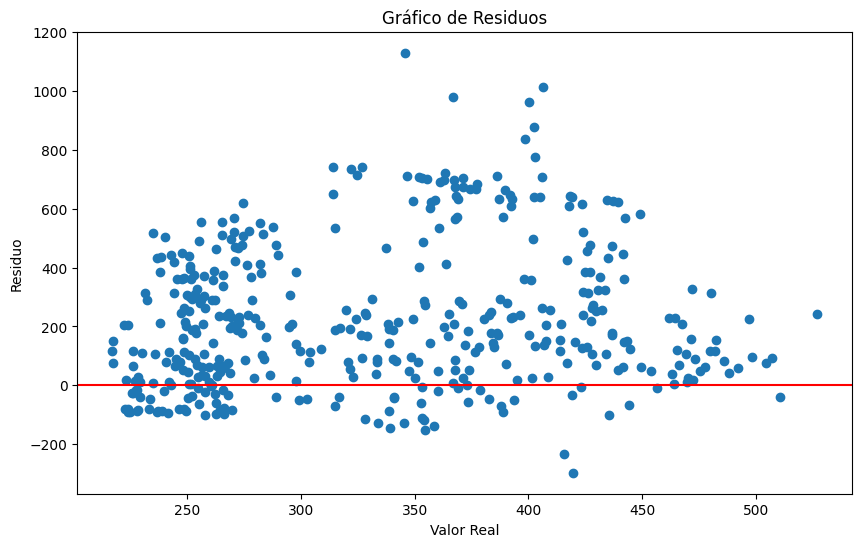

In [56]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

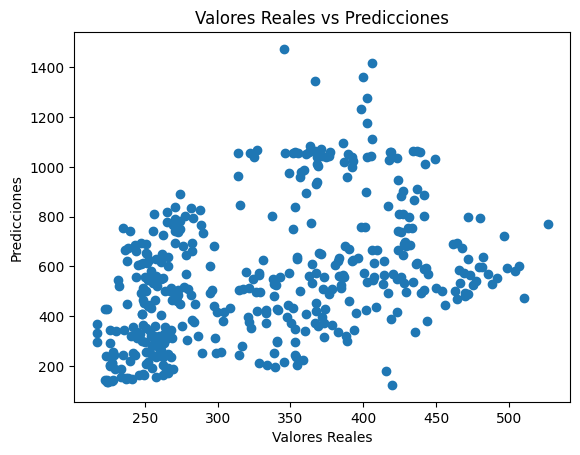

In [57]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(predicciones_futuras, precioB_future)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [48]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    424 non-null    float64
 1   VolUtil    424 non-null    float64
 2   Aportes    424 non-null    float64
 3   PrecioB    424 non-null    float64
 4   PrecioO    424 non-null    float64
 5   DispTer    424 non-null    float64
 6   DispNoTer  424 non-null    float64
 7   year       424 non-null    int32  
 8   month      424 non-null    int32  
 9   day        424 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 31.5 KB


In [49]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [50]:
df_predicciones.head()

,Prediccion_PrecioB,Date
2557,356.831513,2023-01-01
2558,317.397589,2023-01-02
2559,338.892127,2023-01-03
2560,342.758133,2023-01-04
2561,363.085744,2023-01-05


In [51]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [52]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 2557 to 2980
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  424 non-null    float64       
 1   Date                424 non-null    datetime64[ns]
 2   PrecioB_future      424 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.2 KB


In [53]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
2557,356.831513,2023-01-01,499.859663
2558,317.397589,2023-01-02,510.909360
2559,338.892127,2023-01-03,531.093510
2560,342.758133,2023-01-04,556.687833
2561,363.085744,2023-01-05,560.973353
2562,340.364539,2023-01-06,526.727628
2563,314.835781,2023-01-07,503.256190
2564,304.183644,2023-01-08,415.881105
2565,308.633985,2023-01-09,432.687167
2566,303.572568,2023-01-10,382.044767


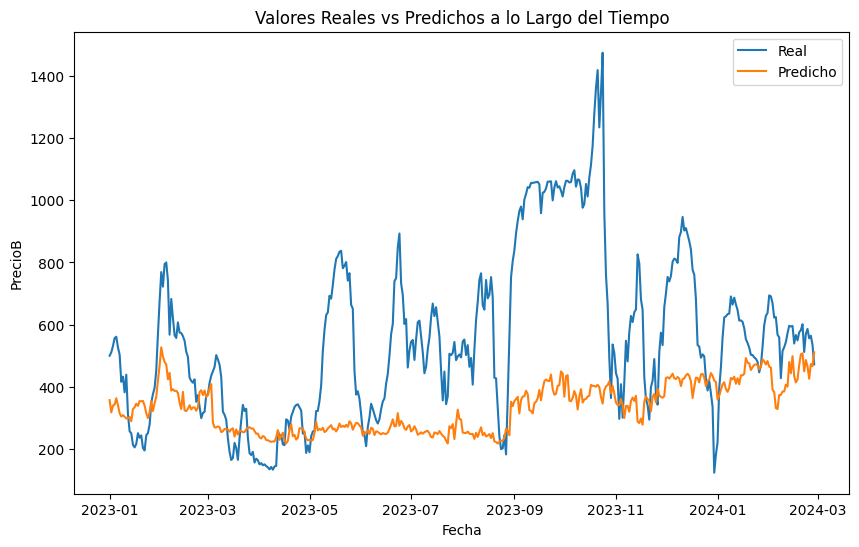

In [54]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()